In [5]:
#Exploratory Data Analysis with Pandas Python

import pandas as pd
import numpy as np
import seaborn as sb



In [79]:
df = pd.read_csv(r'C:\Users\hyeji\Desktop\python practice\coaster_db.csv')

print('data imported')

data imported


In [80]:
#1. Data understanding

df.shape #shape of the dataframe (row, column)

(1087, 56)

In [81]:
df.head() #first five rows of the dataframe
df.columns #display all columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [12]:
# what data type is each column?
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [13]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [83]:
#2.Data Preparation
#1) remove unecessary columns

df =df[['coaster_name', # reassign the revised df to df
    #'Length', 'Speed', 
    'Location', 'Status', #'Opening date',
       #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #   'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
     #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',  
    #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
        'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

df.shape #check the reduced number of columns

#alternatively, drop the columns
#df.drop(['Opening date'],axis=1) dropping columns

(1087, 13)

In [84]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean']) # convert the data type to date

In [87]:
# Rename our columns
df = df.rename(columns = {'coaster_name': 'Coaster_Name',
                     'year_introduced' : 'Year_Introduced',
                     'opening_date_clean': 'Opening_Date',
                     'speed_mph': 'Speed_mph',
                     'height_ft':'Height_ft',
                     'Inversions_clean':'Inversions',
                     'Gforce_clean':'Gforce'})

In [88]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [35]:
df.isna().sum() # check null values per column

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Inversions           0
Gforce             725
dtype: int64

In [89]:
df.duplicated() #bring the result second duplicate values. All Flase, no duplicate values in each row, all columns

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [90]:
df.loc[df.duplicated(subset = ['Coaster_Name'])].head()  #check duplicate vlaues existing in this specific column only 

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [91]:
df.query('Coaster_Name == "Crystal Beach Cyclone"') # checking an example of duplicate

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [94]:
df.duplicated(subset = ['Coaster_Name', 'Location','Opening_Date']).sum()
#97rows where coaster name, lcoation and opening date has the same value 

97

In [51]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

In [52]:
#step 3: Feature Understanding

df['Year_Introduced'].value_counts() #number of unique values

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

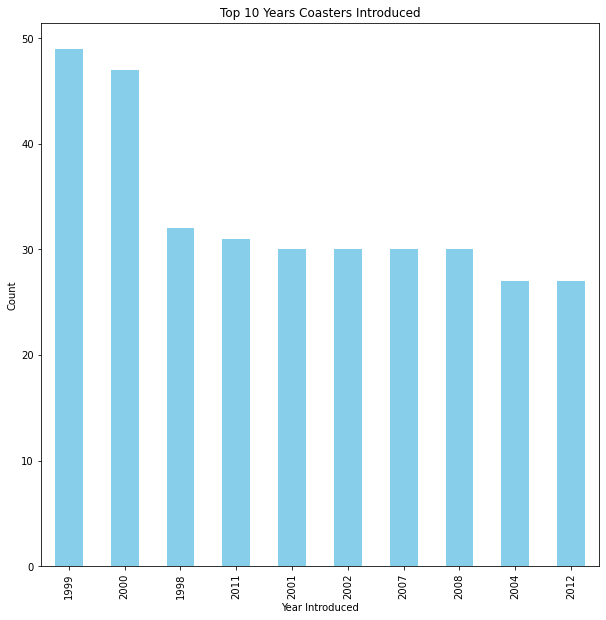

In [95]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind ='bar', color = 'Skyblue', figsize=(10,10), title='Top 10 Years Coasters Introduced') #10 most common years in which roller coasters were introduced 
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

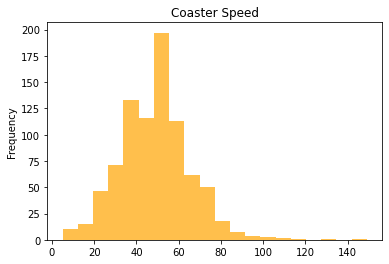

In [67]:
ax= df['Speed_mph'].plot(kind = 'hist', bins = 20, color='orange', alpha=0.7, title='Coaster Speed')
ax.set_xlabel = 'Speed(mph)'
ax.set_ylable = 'Frequency' #different bins, count of the value, shape of the distribution of the column values

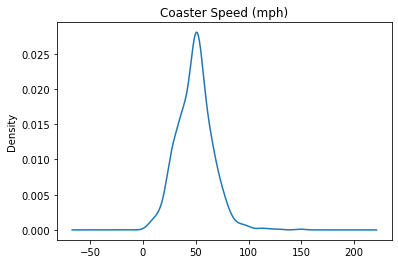

In [69]:
ax= df['Speed_mph'].plot(kind = 'kde', title='Coaster Speed (mph)') #kernel density, look at normalized distribution 
ax.set_xlabel = 'Speed(mph)'
ax.set_ylable = 'Frequency'

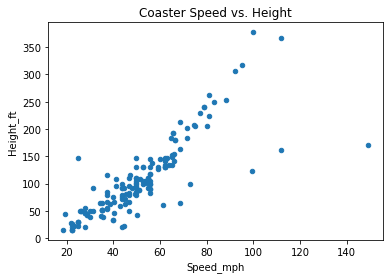

In [97]:
#Step 4 Feature Relationship

#1. compare columns side by side - Scatterplot
ax= df.plot(kind='scatter', 
        x='Speed_mph', 
        y='Height_ft',
       title='Coaster Speed vs. Height') 



<AxesSubplot:xlabel='Speed_mph', ylabel='Height_ft'>

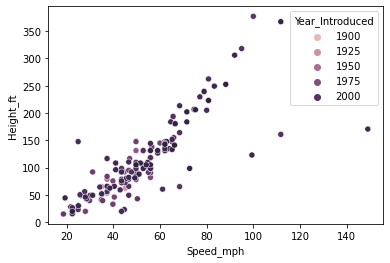

In [102]:
sb.scatterplot(
        x='Speed_mph', 
        y='Height_ft',
       hue='Year_Introduced', # color based on another variable
       data=df)
#Seaborn graph

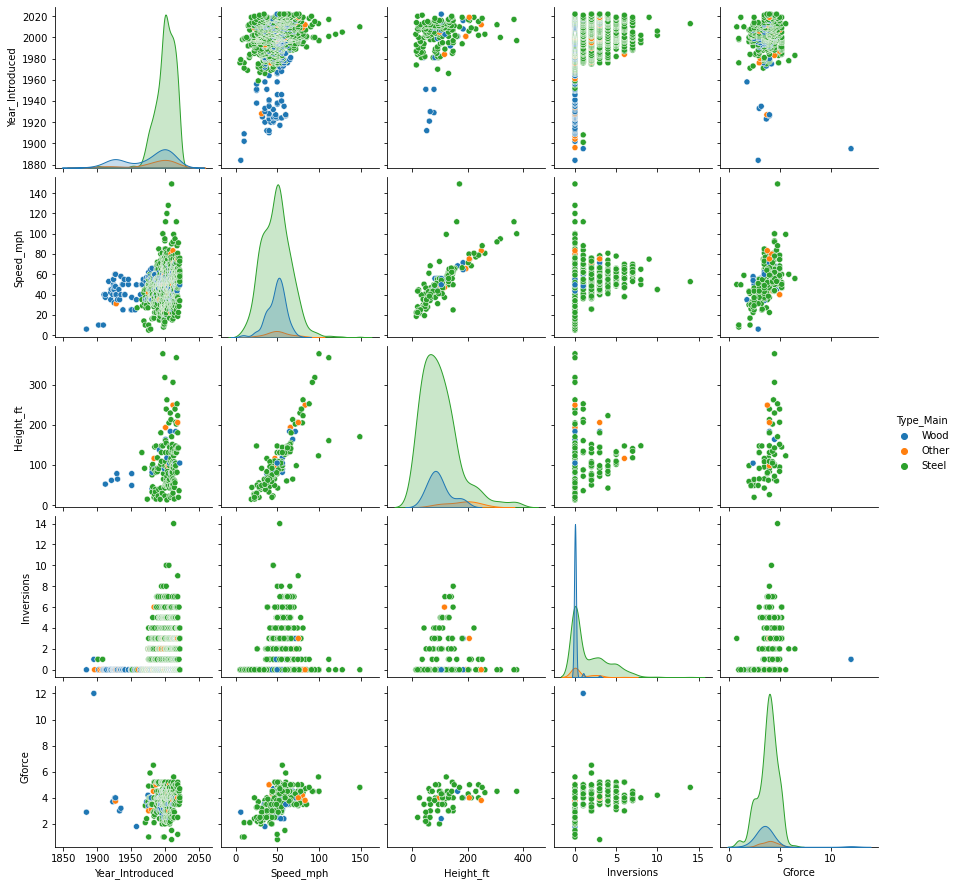

In [104]:

sb.pairplot(df, hue='Type_Main', vars = ['Year_Introduced','Speed_mph', 'Height_ft','Inversions','Gforce']) 
# compare muliple variables, i.e. multipel x variables and y variables - how do they interact with each other?

In [111]:
#correlation
df_corr = df[['Year_Introduced','Speed_mph', 'Height_ft','Inversions','Gforce']].dropna().corr() #correlation 

<AxesSubplot:>

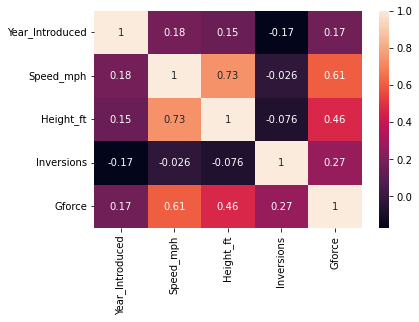

In [112]:
sb.heatmap(df_corr, annot=True)

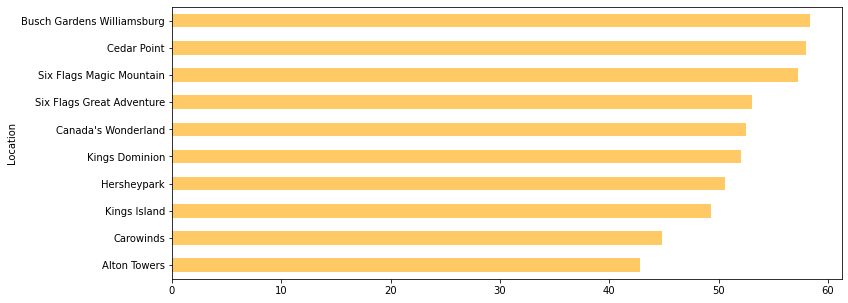

In [144]:
#Step 5: Ask a question about the data
#try to answer a question you have about the data using a plot or statistics

#1. what are the locations with the fastes rollercoasters?(m,in. of 10)

ax = df.query('Location !="Other"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count>=10').sort_values('mean')['mean'].plot(kind='barh',color = 'orange', alpha=0.6, figsize = (12,5))
#group by location and get speed column for each location, and get 'mean' and 'count', i.e. average and count of speed mph
ax.set_xlabel = 'Average Cost Speed'

# Location with the highest average speed is Busch Gardens Williamburg
